In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [4]:
dir='D:/fishessss'
classes = [i for i in os.listdir(dir)]
classes

['Bam(Wam,Eel)',
 'Bangda(Mackerel)',
 'Black Pamplet',
 'Bombil',
 'China Rohu',
 'Katla',
 'Lempa',
 'Maral',
 'Mirgal(American Rohu)',
 'Mohri',
 'Pahadi(Red Snapper)',
 'Pankaj(local surmai)',
 'Prawn',
 'Rawas',
 'Rohu',
 'Roopchand',
 'Singhara',
 'Surmai',
 'Tilapia(Chilapi)',
 'White Pamplet']

In [12]:
label=[]
path=[]
for dirname, _ ,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.jpg' or os.path.splitext(filename)[-1]=='.png' or os.path.splitext(filename)[-1]=='.jpeg' :
            label.append(os.path.split(dirname)[-1])
            path.append(os.path.join(dirname,filename))

In [13]:
df=pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label
df

,path,label
0,"D:/fishessss\Bam(Wam,Eel)\01.jpg","Bam(Wam,Eel)"
1,"D:/fishessss\Bam(Wam,Eel)\1615717150975_varian...","Bam(Wam,Eel)"
2,"D:/fishessss\Bam(Wam,Eel)\255362.jpeg","Bam(Wam,Eel)"
3,"D:/fishessss\Bam(Wam,Eel)\9eebb389-0493-4f05-b...","Bam(Wam,Eel)"
4,"D:/fishessss\Bam(Wam,Eel)\black-eel-vam-fish-1...","Bam(Wam,Eel)"
...,...,...
1684,D:/fishessss\White Pamplet\IMG_20230416_195220...,White Pamplet
1685,D:/fishessss\White Pamplet\IMG_20230416_195221...,White Pamplet
1686,D:/fishessss\White Pamplet\WhatsApp Image 2023...,White Pamplet
1687,D:/fishessss\White Pamplet\WhatsApp Image 2023...,White Pamplet


In [14]:
df['label'].value_counts()

Bangda(Mackerel)         263
Lempa                    181
Black Pamplet            138
White Pamplet            121
Prawn                    115
Bombil                   106
Mohri                     93
Surmai                    88
Katla                     77
Tilapia(Chilapi)          66
Roopchand                 56
Pankaj(local surmai)      54
Rohu                      50
Bam(Wam,Eel)              50
China Rohu                46
Pahadi(Red Snapper)       42
Mirgal(American Rohu)     40
Maral                     35
Rawas                     34
Singhara                  34
Name: label, dtype: int64

In [15]:
from rembg import remove
from PIL import Image
id=0
sep_dir='D:/PreProcessed_Dataset/'
if not os.path.exists(sep_dir):
    os.mkdir(sep_dir)
for path,label in df.values:
    if not os.path.exists(os.path.join(sep_dir,label)):
        os.mkdir(os.path.join(sep_dir,label))
    id=id+1
    ot_path= os.path.join('D:/PreProcessed_Dataset/',label,str(id)+'.png')
    input = Image.open(path)
    output = remove(input)
    output.save(ot_path)
    

In [37]:
processed_images='D:/PreProcessed_Dataset'
img_label=[]
img_path=[]
for dirname, _ ,filenames in os.walk(processed_images):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            img_label.append(os.path.split(dirname)[-1])
            img_path.append(os.path.join(dirname,filename))      

In [43]:
img_df=pd.DataFrame(columns=['path','label'])
img_df['path']= img_path
img_df['label']= img_label
img_df

,path,label
0,"D:/PreProcessed_Dataset\Bam(Wam,Eel)\1.png","Bam(Wam,Eel)"
1,"D:/PreProcessed_Dataset\Bam(Wam,Eel)\10.png","Bam(Wam,Eel)"
2,"D:/PreProcessed_Dataset\Bam(Wam,Eel)\11.png","Bam(Wam,Eel)"
3,"D:/PreProcessed_Dataset\Bam(Wam,Eel)\12.png","Bam(Wam,Eel)"
4,"D:/PreProcessed_Dataset\Bam(Wam,Eel)\13.png","Bam(Wam,Eel)"
...,...,...
1684,D:/PreProcessed_Dataset\White Pamplet\1685.png,White Pamplet
1685,D:/PreProcessed_Dataset\White Pamplet\1686.png,White Pamplet
1686,D:/PreProcessed_Dataset\White Pamplet\1687.png,White Pamplet
1687,D:/PreProcessed_Dataset\White Pamplet\1688.png,White Pamplet


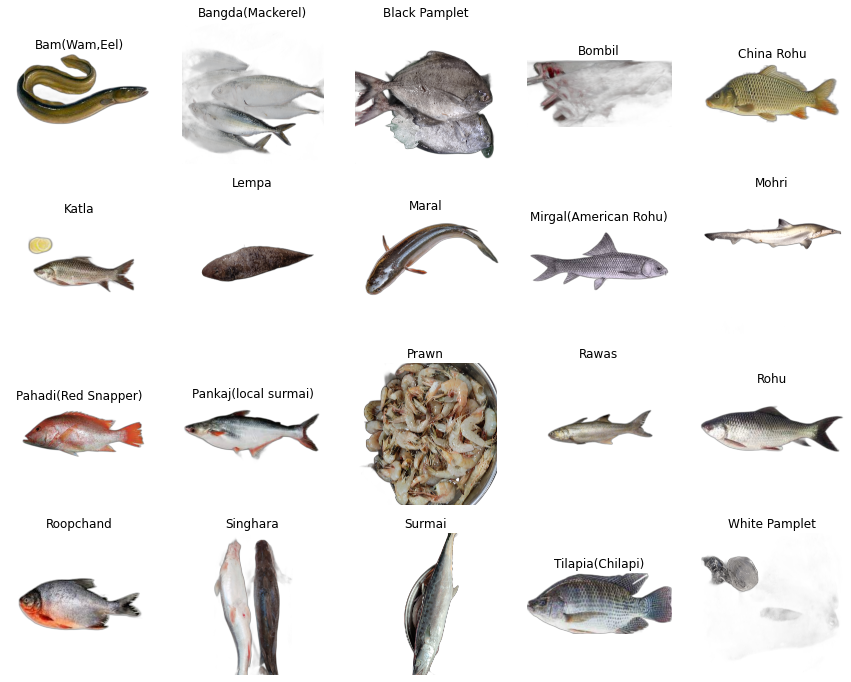

In [47]:
idx=0
plt.figure(figsize=(15,12))
for i in img_df['label'].unique():
    plt.subplot(4,5,idx+1)
    plt.imshow(plt.imread(img_df[img_df['label']==i].iloc[0,0]))
    plt.title(i)
    plt.axis('off')
    idx+=1

In [60]:
train_df, test_df= train_test_split(img_df,train_size=0.8, shuffle=True, random_state =42)

In [61]:
print(img_df.shape)
print(train_df.shape)
print(test_df.shape)

(1689, 2)
(1351, 2)
(338, 2)


In [62]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocess_input, validation_split= 0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= preprocess_input)

In [64]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=True, seed=42, subset='validation')
test_images = train_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224,224), color_mode='rgb', class_mode='categorical',batch_size=32, shuffle=False)

Found 1081 validated image filenames belonging to 20 classes.
Found 270 validated image filenames belonging to 20 classes.
Found 338 validated image filenames belonging to 20 classes.


In [54]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Bam(Wam,Eel)': 0,
 'Bangda(Mackerel)': 1,
 'Black Pamplet': 2,
 'Bombil': 3,
 'China Rohu': 4,
 'Katla': 5,
 'Lempa': 6,
 'Maral': 7,
 'Mirgal(American Rohu)': 8,
 'Mohri': 9,
 'Pahadi(Red Snapper)': 10,
 'Pankaj(local surmai)': 11,
 'Prawn': 12,
 'Rawas': 13,
 'Rohu': 14,
 'Roopchand': 15,
 'Singhara': 16,
 'Surmai': 17,
 'Tilapia(Chilapi)': 18,
 'White Pamplet': 19}

{'Bam(Wam,Eel)': 0,
 'Bangda(Mackerel)': 1,
 'Black Pamplet': 2,
 'Bombil': 3,
 'China Rohu': 4,
 'Katla': 5,
 'Lempa': 6,
 'Maral': 7,
 'Mirgal(American Rohu)': 8,
 'Mohri': 9,
 'Pahadi(Red Snapper)': 10,
 'Pankaj(local surmai)': 11,
 'Prawn': 12,
 'Rawas': 13,
 'Rohu': 14,
 'Roopchand': 15,
 'Singhara': 16,
 'Surmai': 17,
 'Tilapia(Chilapi)': 18,
 'White Pamplet': 19}

{'Bam(Wam,Eel)': 0,
 'Bangda(Mackerel)': 1,
 'Black Pamplet': 2,
 'Bombil': 3,
 'China Rohu': 4,
 'Katla': 5,
 'Lempa': 6,
 'Maral': 7,
 'Mirgal(American Rohu)': 8,
 'Mohri': 9,
 'Pahadi(Red Snapper)': 10,
 'Pankaj(local surmai)': 11,
 'Prawn': 12,
 'Rawas': 13,
 'Rohu': 14,
 'Roopchand': 15,
 'Singhara': 16,
 'Surmai': 17,
 'Tilapia(Chilapi)': 18,
 'White Pamplet': 19}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Icon\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input 

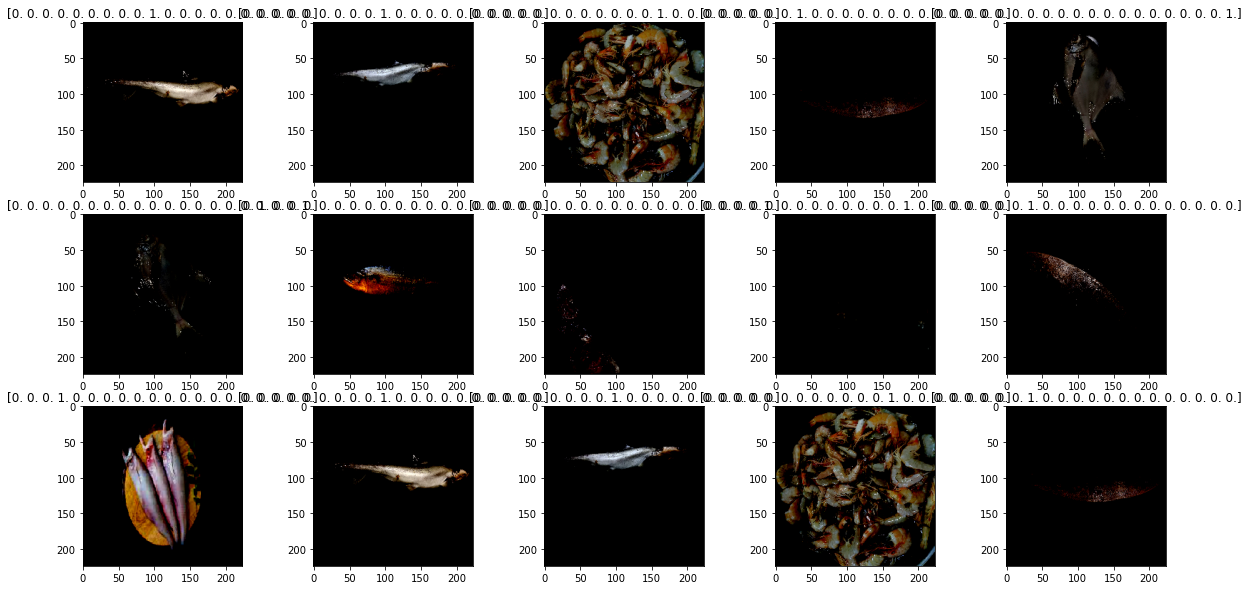

In [65]:
fit, ax=plt.subplots(nrows=3, ncols=5, figsize=(20,10))
ax=ax.flatten()
j=0
for _ in range (15):
    img, label=test_images.next()
    ax[j].imshow(img[0])
    ax[j].set_title(label[0])
    j=j+1

In [66]:
pretrained_model=tf.keras.applications.MobileNetV2(
input_shape=(224,224,3),
include_top=False,
weights='imagenet',
pooling='avg')

pretrained_model.trainable=False

In [68]:
inputs= pretrained_model.input

x= tf.keras.layers.Dense(128,activation='relu')(pretrained_model.output)
x= tf.keras.layers.Dense(128,activation='relu')(x)
outputs= tf.keras.layers.Dense(20,activation='softmax')(x)

model=tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(train_images,
                   validation_data=val_images,
                   epochs = 10)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [69]:
result=model.evaluate(test_images, verbose=0)
print('Test Loss: {:.5f}'.format(result[0]))
print('Test Accuracy: {:.2f}%'.format(result[1]*100))

Test Loss: 0.44887
Test Accuracy: 88.76%


In [70]:
pred=model.predict(test_images)
pred= np.argmax(pred, axis=1)

11/11 [==============================] - 109s 10s/step


In [71]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']= pred_df['pred'].apply(lambda x: labels[x])

In [72]:
pred_df.reset_index(drop=True).head(10)

,path,label,pred
0,D:/PreProcessed_Dataset\Mohri\959.png,Mohri,Mohri
1,D:/PreProcessed_Dataset\White Pamplet\1635.png,White Pamplet,White Pamplet
2,D:/PreProcessed_Dataset\Lempa\753.png,Lempa,Lempa
3,D:/PreProcessed_Dataset\Surmai\1423.png,Surmai,Surmai
4,D:/PreProcessed_Dataset\Lempa\765.png,Lempa,Lempa
5,D:/PreProcessed_Dataset\Bangda(Mackerel)\128.png,Bangda(Mackerel),Bangda(Mackerel)
6,D:/PreProcessed_Dataset\Tilapia(Chilapi)\1542.png,Tilapia(Chilapi),Tilapia(Chilapi)
7,D:/PreProcessed_Dataset\Black Pamplet\384.png,Black Pamplet,Black Pamplet
8,D:/PreProcessed_Dataset\Mohri\980.png,Mohri,Mohri
9,D:/PreProcessed_Dataset\Bangda(Mackerel)\119.png,Bangda(Mackerel),Bangda(Mackerel)


D:/PreProcessed_Dataset\Mohri\959.png
D:/PreProcessed_Dataset\White Pamplet\1635.png
D:/PreProcessed_Dataset\Lempa\753.png
D:/PreProcessed_Dataset\Surmai\1423.png
D:/PreProcessed_Dataset\Lempa\765.png
D:/PreProcessed_Dataset\Bangda(Mackerel)\128.png
D:/PreProcessed_Dataset\Tilapia(Chilapi)\1542.png
D:/PreProcessed_Dataset\Black Pamplet\384.png
D:/PreProcessed_Dataset\Mohri\980.png
D:/PreProcessed_Dataset\Bangda(Mackerel)\119.png


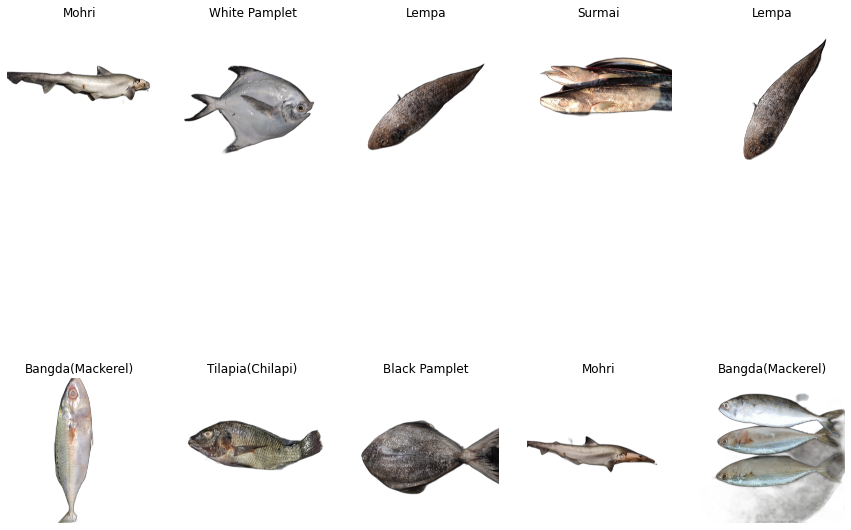

In [73]:
idx=0
plt.figure(figsize=(15,12))
for i,j,k in pred_df.values[:10]:
    print(i)
    plt.subplot(2,5,idx+1)
    plt.imshow(plt.imread(i))
    plt.title(j)
    plt.axis('off')
    idx+=1